# Dépenses de consommation trimestrielles des ménages

## Data Management

### Importations des packages

In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_pca_correlation_graph
import os

%matplotlib inline

cwd = os.getcwd()

### Importation des données

In [2]:
conso_tri = pd.read_csv('Ressources/Consommation des ménages trimestrielle.csv',sep=';')
conso_tri = conso_tri.set_index('Période').replace({',':'.'},regex=True).astype('float64')

In [3]:
conso_tri.columns

Index(['Produits agricoles', 'Energie, eau, déchets',
       'Produits agro-alimentaires', 'Cokéfaction et raffinage',
       ' Biens d'équipement', 'Matériels de transport',
       'Autres produits industriels', 'Construction', 'Commerce', 'Transport',
       'Hébergement-restauration', 'Information-communication',
       'Services financiers', 'Services immobiliers',
       'Services aux entreprises', 'Services non marchands',
       'Services aux ménages', 'TOTAL '],
      dtype='object')

### Year to year variations

In [4]:
yty_var = pd.DataFrame()
for column in conso_tri.columns:
    var=[]
    for i in range(4,len(conso_tri.T.columns),1):
        var.append((conso_tri[column][i]-conso_tri[column][i-4])/conso_tri[column][i-4])
    yty_var[column]=pd.Series(var)

In [5]:
yty_var=yty_var.set_index(conso_tri.index.drop('1990T1').drop('1990T2').drop('1990T3').drop('1990T4')).T

## ACP

In [6]:
from sklearn.preprocessing import StandardScaler
X_yty_var = StandardScaler().fit_transform(yty_var.T)

pca = PCA()
X_pca = pd.DataFrame(pca.fit_transform(X_yty_var))
print(np.around(pca.explained_variance_ratio_,3))

[0.293 0.127 0.091 0.076 0.063 0.059 0.05  0.043 0.037 0.033 0.031 0.027
 0.019 0.018 0.014 0.01  0.008 0.001]


Text(0.5, 1.0, 'Variance expliquée')

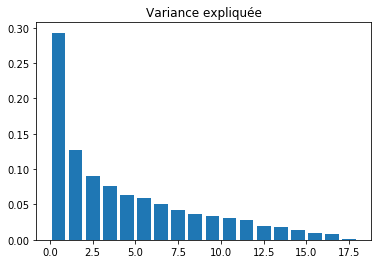

In [7]:
plt.bar(np.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée")

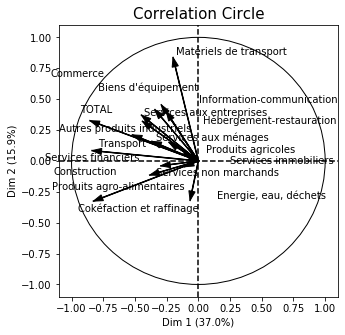

In [8]:
figure, correlation_matrix = plot_pca_correlation_graph(yty_var.T, 
                                                        yty_var.T.columns,
                                                        figure_axis_size=5)

In [9]:
principal_components = pd.DataFrame(pca.components_)
principal_components = principal_components.rename({i : 'PC'+str(i+1) for i in range(len(principal_components.columns))},axis=1)
principal_components = principal_components.rename(dict(zip(range(len(yty_var.T.columns)),yty_var.T.columns)))

In [10]:
principal_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Produits agricoles,-0.057967,-0.009791,-0.206542,-0.212587,-0.286928,-0.132358,-0.326237,-0.182181,-0.220848,-0.215477,-0.285986,-0.302313,-0.251700,-0.210912,-0.269579,-0.107170,-0.212407,-0.404633
"Energie, eau, déchets",-0.195164,0.304346,0.235915,-0.034448,-0.092090,-0.302971,-0.020912,0.238975,-0.308551,0.089777,-0.336299,0.092664,-0.006764,0.414259,-0.149756,0.476429,0.092605,-0.005750
Produits agro-alimentaires,0.391273,0.380406,0.328096,0.357920,-0.154959,-0.186826,0.101101,-0.045646,-0.142566,-0.095137,-0.065582,-0.163921,0.344782,-0.283750,-0.195066,-0.209042,-0.144157,0.180985
Cokéfaction et raffinage,0.500924,0.222146,0.077547,-0.363561,0.269309,-0.087102,0.130966,-0.150869,0.084890,-0.280851,0.030911,0.331526,-0.333210,0.136330,-0.242130,-0.097764,0.202751,-0.075182
Biens d'équipement,-0.013741,-0.316934,0.132157,-0.048928,0.281306,-0.035855,0.212162,-0.558114,-0.364470,0.388638,-0.042073,0.112924,0.083633,-0.200671,-0.215020,0.210495,-0.076799,-0.021907
Matériels de transport,0.045414,0.223475,0.314237,-0.028239,-0.079041,0.426420,-0.347531,-0.214439,0.245862,0.196404,-0.163295,0.230680,-0.150153,0.102193,0.082937,0.064494,-0.514399,0.077942
Autres produits industriels,0.072600,0.267004,-0.361955,-0.074552,0.049453,0.615900,-0.002362,-0.068499,-0.218773,-0.001617,-0.350429,-0.113588,0.176873,-0.049413,-0.067690,0.058489,0.360729,0.212064
Construction,0.337897,-0.238258,-0.137763,-0.270368,0.128704,-0.017570,0.065889,0.071928,-0.019705,-0.368861,-0.096516,-0.136321,0.390980,0.133889,0.214387,0.375854,-0.431301,0.046978
Commerce,-0.136038,-0.348540,0.428788,-0.130752,-0.441026,0.246144,0.155611,0.007246,-0.224908,-0.404267,-0.100506,0.310221,0.034691,-0.088994,0.096074,-0.103909,0.162501,0.061556
Transport,-0.005990,0.142952,-0.104703,0.355958,-0.006471,-0.112010,-0.051996,-0.528221,-0.267229,-0.269286,0.076212,-0.041975,-0.171554,0.308658,0.516368,-0.007234,0.064940,0.021189


Les 3 premières composantes principales représentent plus de 50%. Les catégories qu'on en déduit sont : 
- PC1 : Produits agro-alimentaires ; Cokéfaction et raffinage ; Information communication 
- PC2 : Produits agro-alimentaires ; Energie, eau, déchets ; Biens d'équipement ; Commerce ; Information-communication 
- PC3 : Biens d’équipement ; Commerce ; Autres produits industriels ; Services aux entreprises ; Produits agro-alimentaires



## Analyse de la variance

### Calcul du poids de chaque catégorie

In [11]:
weights = pd.DataFrame()
for column in conso_tri.T.columns:
    cat = []
    for i in range(0,18,1):
        cat.append(conso_tri.T[column][i]/conso_tri.T[column][17])
    weights[column]= pd.Series(cat)
weights=weights.set_index(conso_tri.T.index)

In [12]:
t_weights=weights.iloc[:-1,:].T
mean_weights= pd.DataFrame()
for column in t_weights.columns:
    m=[t_weights[column].mean()]
    mean_weights[column]=pd.Series(m)
mean_weights.index=['Poids moyen']

In [13]:
mean_weights.T

,Poids moyen
Produits agricoles,0.029587
"Energie, eau, déchets",0.042214
Produits agro-alimentaires,0.153231
Cokéfaction et raffinage,0.042582
Biens d'équipement,0.030978
Matériels de transport,0.062470
Autres produits industriels,0.144076
Construction,0.014645
Commerce,0.012431
Transport,0.029877


### Variance des variations

In [14]:
t_yty = yty_var.iloc[:-1,:].T
variance= pd.DataFrame()
for column in t_yty.columns:
    v=[]
    s=0
    for i in range(0,len(t_yty[column]),1):
        s= s+ (t_yty[column][i]-t_yty[column].sum())**2
    v.append((1/(len(t_yty[column])))*s)
    variance[column]=pd.Series(v)
variance.index=['Variance de variation']

In [15]:
variance.T

,Variance de variation
Produits agricoles,6.978181
"Energie, eau, déchets",18.321859
Produits agro-alimentaires,8.480389
Cokéfaction et raffinage,9.814771
Biens d'équipement,6.240244
Matériels de transport,6.631205
Autres produits industriels,3.960763
Construction,17.290893
Commerce,9.917489
Transport,20.547509


### Part de la variance

In [16]:
share_of_variance=pd.DataFrame()
for column in variance.columns: 
    p=[]
    s=0
    for i in range(0,17,1):
        s=s+ variance.T['Variance de variation'][i]*mean_weights.T['Poids moyen'][i]
    p.append((variance[column][0]*mean_weights[column][0])/s)
    share_of_variance[column]=pd.Series(p)
share_of_variance.index=['Part de la variance']

In [17]:
share_of_variance.T

,Part de la variance
Produits agricoles,0.017167
"Energie, eau, déchets",0.064309
Produits agro-alimentaires,0.108046
Cokéfaction et raffinage,0.034750
Biens d'équipement,0.016073
Matériels de transport,0.034444
Autres produits industriels,0.047448
Construction,0.021056
Commerce,0.010251
Transport,0.051044


On en déduit donc 4 catégories principales : Services immobiliers (0,3) ; Produits agro-alimentaires (0,11) ; Hébergement-restauration (0,09) ; Services non marchands (0,07) 